## Conference Course: Monte Carlo Simulations

### Topic: Rejection Sampling


## Background:

Rejection Sampling provides us an introduction into Monte Carlo Markov Chains by laying a foundation into our ultimate goal of using distributions we can sample from to approximate sampling from a distribution which, for whatever reason, we can't sample from through the use simulation.

Rejection sampling assumes we have two probability densities $p(x)$ and $q(x)$ where $p(x)$ is our "target" distribution i.e. the distribution we wish to sample from but can't and $q(x)$, the distribution we have available.

From our two densities, we construct the following constant M:

$$M = \max_{x} \frac{p(x)}{q(x)}$$

This implies $p(x)$ and $q(x)$ must have the same support. As we'll see later in the proof, this constant M will provide us a ton of information into how Rejection Sampling works.
Once M has been constructed, we can use the following algorithm to show that all r.v., X, sampled from $q(x)$ come from our target distribution, $p(x)$.

The algorithm:
Sample: $X \sim q(x)$ and $u \sim U[0,1]$

Test:
if:
$$U < \frac{p(x)}{M*q(x)}$$
then:
$$X \sim p$$

else:
repeat the experiment


### Proof of Rejection Sampling


The proof of rejection sampling is as follows:
$\space$

Our goal is to show $X \sim p(x)$.

Background: When we pull a random sample from $q(x)$ theres a chance we accept or reject the sample. This chance is a random variable (r.v) that we call $Z$. $Z$ can take on values 1 or 0, either accept or reject the condition. This makes $Z \sim  \text{Bernoulli}(\frac{f(x)}{Mg(x)})$. Here, we'll call the r.v we pull from our proposed distribution, $q(x)$ $K$. It follows that $K \sim q(x)$. We're intersted in the following result:

$$K | Z=1$$

Essentially, what is the distribution of K given we accept the condition? By doing so, we bound our r.v and can show K comes from the same distribution as $X$. The motivation comes from the definition of the cumulative density function (CDF):
$$Pr(X \in A) = \int_{A} p(x)\text{dx} = P(A)$$

over the sample sapce of p(x).
\space
If X and K share the same sample space after the accepting the condition then it follows:
$$
Pr(X \in A) = Pr((K | Z=1) \in  A ) = Pr(K \in A | Z=1) 
$$

Using Bayes Theorem we can rewrite $Pr(K \in A | Z=1)$ as:

$$
Pr(K \in A | Z=1) = \frac{Pr(Z = 1 | K \in A) \cdot Pr(K \in A)}{Pr(Z=1)}
$$

Focus on $Pr(Z = 1 | K \in A)$ because using our conditional formula, we can rewrite this as:

$$
Pr(Z = 1 | K \in A) = \frac{Pr(Z=1 \cap K \in A)}{Pr(K \in A)}
$$

or:
$$
Pr(Z = 1 | K \in A)*Pr(K \in A) =Pr(Z=1 \cap K \in A)
$$

Plugging this back into $Pr(K \in A | Z=1)$ and doing some elimination:
$$
Pr(K \in A | Z=1) = \frac{Pr(Z=1 \cap K \in A)}{Pr(Z=1)}
$$

Looking deeper into $Pr(Z=1 \cap K \in A)$, this is something we can evaluate:
<br>
By the law of Total Probability:

$$
Pr(Z=1 \cap K \in A) = \int_{A} (U < \frac{p(x)}{Mq(x)}) \cdot q(x)\text{dx} = \iint_{0}^{1} (U < \frac{p(x)}{Mq(x)}) \cdot q(x) \text{dx} = \int_{-\infty}^{a} \frac{p(x)}{Mq(x)}\cdot q(x) \text{dx}
$$

$$
\Rightarrow \int_{-\infty}^{a} \frac{p(x)}{M}\text{dx} = \frac{1}{M} \int_{-\infty}^{a}p(x)\text{dx} = \frac{1}{M} Pr(X \in A) = \frac{1}{M} \cdot F(A)
$$


Now we turn our focus to $Pr(Z=1)$ which denotes the probability of acceptance:
$$
Pr(Z=1) = \iint_{0}^{1} (U < \frac{p(x)}{Mq(x)}) q(x) \text{dydx} = \int_{-\infty}^{\infty} \frac{f(x)}{Mg(x)}\,dx = \frac{1}{M} \int_D \frac{f(x)}{g(x)}\,dx = \frac{1}{M}
$$
Finishing up:
$$
Pr(K \in A | Z=1) = \frac{\frac{1}{M} Pr(X \in A)}{\frac{1}{M}} = Pr(X \in A)
$$


Now, we turn our attention into coding our solution and showing our algorithm works

In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np


For this example, We're going the use the values of $\text{Exp}(\lambda = 2)$ to emulate coming values from a standard exponential distribution using rejection-sampling.

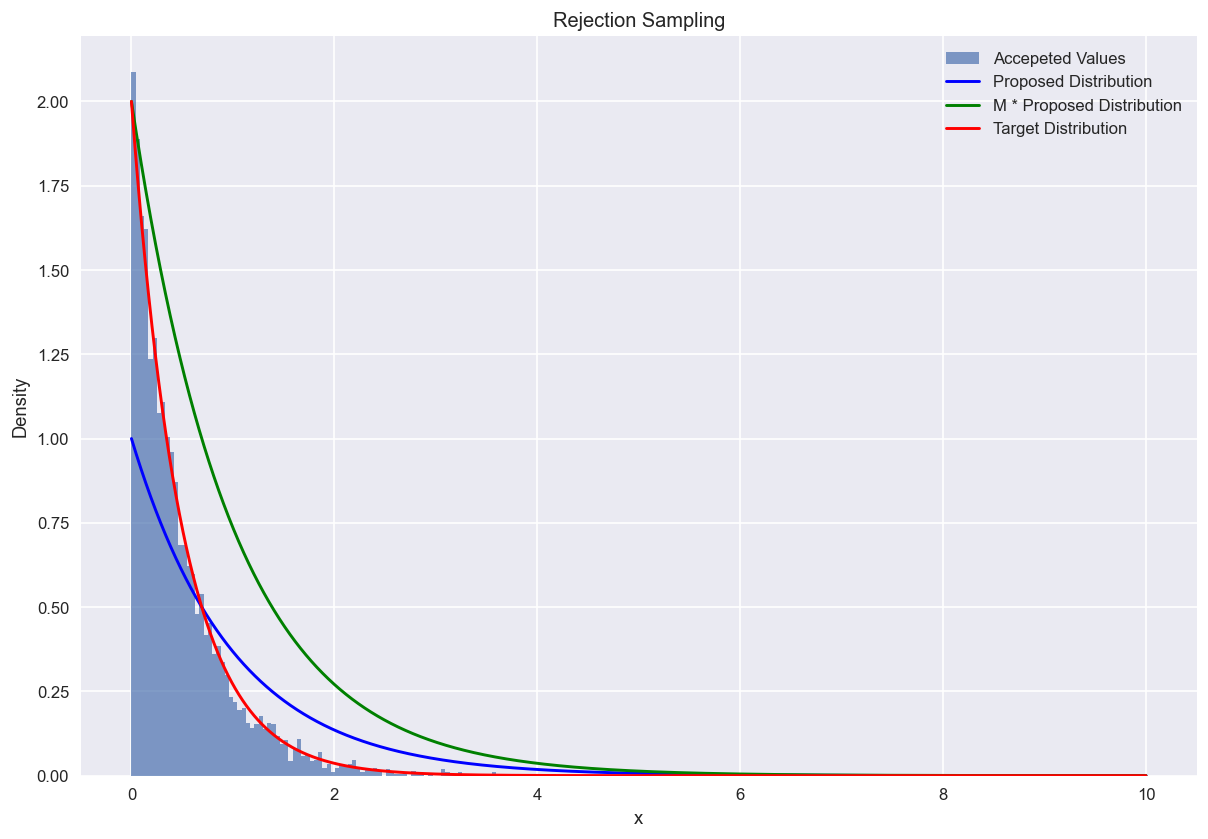

In [47]:
plt.figure(figsize=[12,8], dpi=120)


#implementing the algorithm

def rejection_sampling(num_samples, M, prop_dist, target_dist):
    samples = []
    for _ in range(num_samples):
            #Random variable from our proposed distribution
            x = prop_dist.rvs()
            #Random variable from our uniform distribution
            u = scipy.stats.uniform.rvs()
                
            #Ratio is the realized random variable evaluated at both the proposed and the target distributions
            ratio = target_dist.pdf(x) / (prop_dist.pdf(x)*M)
            
            
            if u <= (ratio):  # Accept-reject condition
                
                samples.append(x)
    return np.array(samples)

#Setting distributions

#For our proposed distribution we're going to use exp(lambda = 1)
proposal_pdf = scipy.stats.expon

#for our target distribution, we want to target exp(lambda=1/2)
target_pdf = scipy.stats.expon(scale=1/2)


#Doing some math, we calculate the constant M. In this case it comes out to be 2

#Running Rejection sampling
rejection_samples = rejection_sampling(num_samples=10000, M=2, prop_dist=proposal_pdf, target_dist=target_pdf)




#Plotting the functions
x_vals = np.linspace(0, 10, len(rejection_samples))
plt.hist(rejection_samples, bins=100, density=True,alpha=0.7, label='Rejection Samples')
#plt.plot(x_vals, samples, 'bo')
plt.plot(x_vals, proposal_pdf.pdf(x_vals), 'b-')
plt.plot(x_vals, 2 * proposal_pdf.pdf(x_vals), 'g-')
plt.plot(x_vals, target_pdf.pdf(x_vals) , 'r-')
    



plt.legend(["Accepeted Values","Proposed Distribution", "M * Proposed Distribution","Target Distribution"])
plt.title("Rejection Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()


Acceptance rate: 0.40%


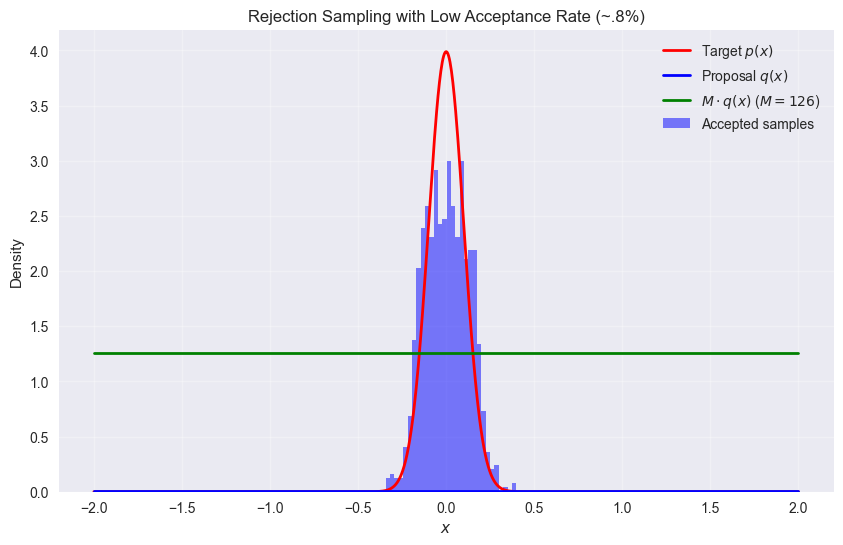

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Target distribution: Narrow Gaussian (mean=0, std=0.1)
def p(x):
    return norm.pdf(x, loc=0, scale=0.1)

# Proposal distribution: Uniform [-50, 50]
def q(x):
    return uniform.pdf(x, loc=-50, scale=100)  # PDF of uniform [-50, 50]

# Scaling constant (M = 126)
M = 126

# Rejection sampling
def rejection_sampling(num_samples):
    samples = []
    num_proposals = 0
    while len(samples) < num_samples:
        x = np.random.uniform(-50, 50)  # Sample from q(x)
        u = np.random.uniform(0, 1)
        num_proposals += 1
        if u < p(x) / (M * q(x)):
            samples.append(x)
    acceptance_rate = len(samples) / num_proposals
    print(f"Acceptance rate: {acceptance_rate:.2%}")
    return samples

# Generate samples
samples = rejection_sampling(1000) 


# Plotting
x_vals = np.linspace(-2, 2, 1000)  # Zoom near the target
plt.figure(figsize=(10, 6))

# Plot target distribution p(x)
plt.plot(x_vals, p(x_vals), 'r-', lw=2, label="Target $p(x)$")
plt.plot(x_vals, q(x_vals), 'b', lw=2, label=f"Proposal $q(x)$")

# Plot scaled proposal distribution M * q(x)
plt.plot(x_vals, M * q(x_vals), 'g', lw=2, label=f"$M \cdot q(x)$ ($M={M}$)")

# Plot histogram of accepted samples
plt.hist(samples, bins=30, density=True, alpha=0.5, color='blue', label="Accepted samples")



# Add legend and labels
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Density")
plt.title("Rejection Sampling with Low Acceptance Rate (~.8%)")
plt.grid(True, alpha=0.3)
plt.show()